In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image as im
from scipy.ndimage import interpolation as inter

In [3]:
img_path = r"states/California-County-Map.jpg"
img = cv2.imread(img_path)

In [4]:
def display(path):
    dpi = 80
    im_data = plt.imread(path)
    height, width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

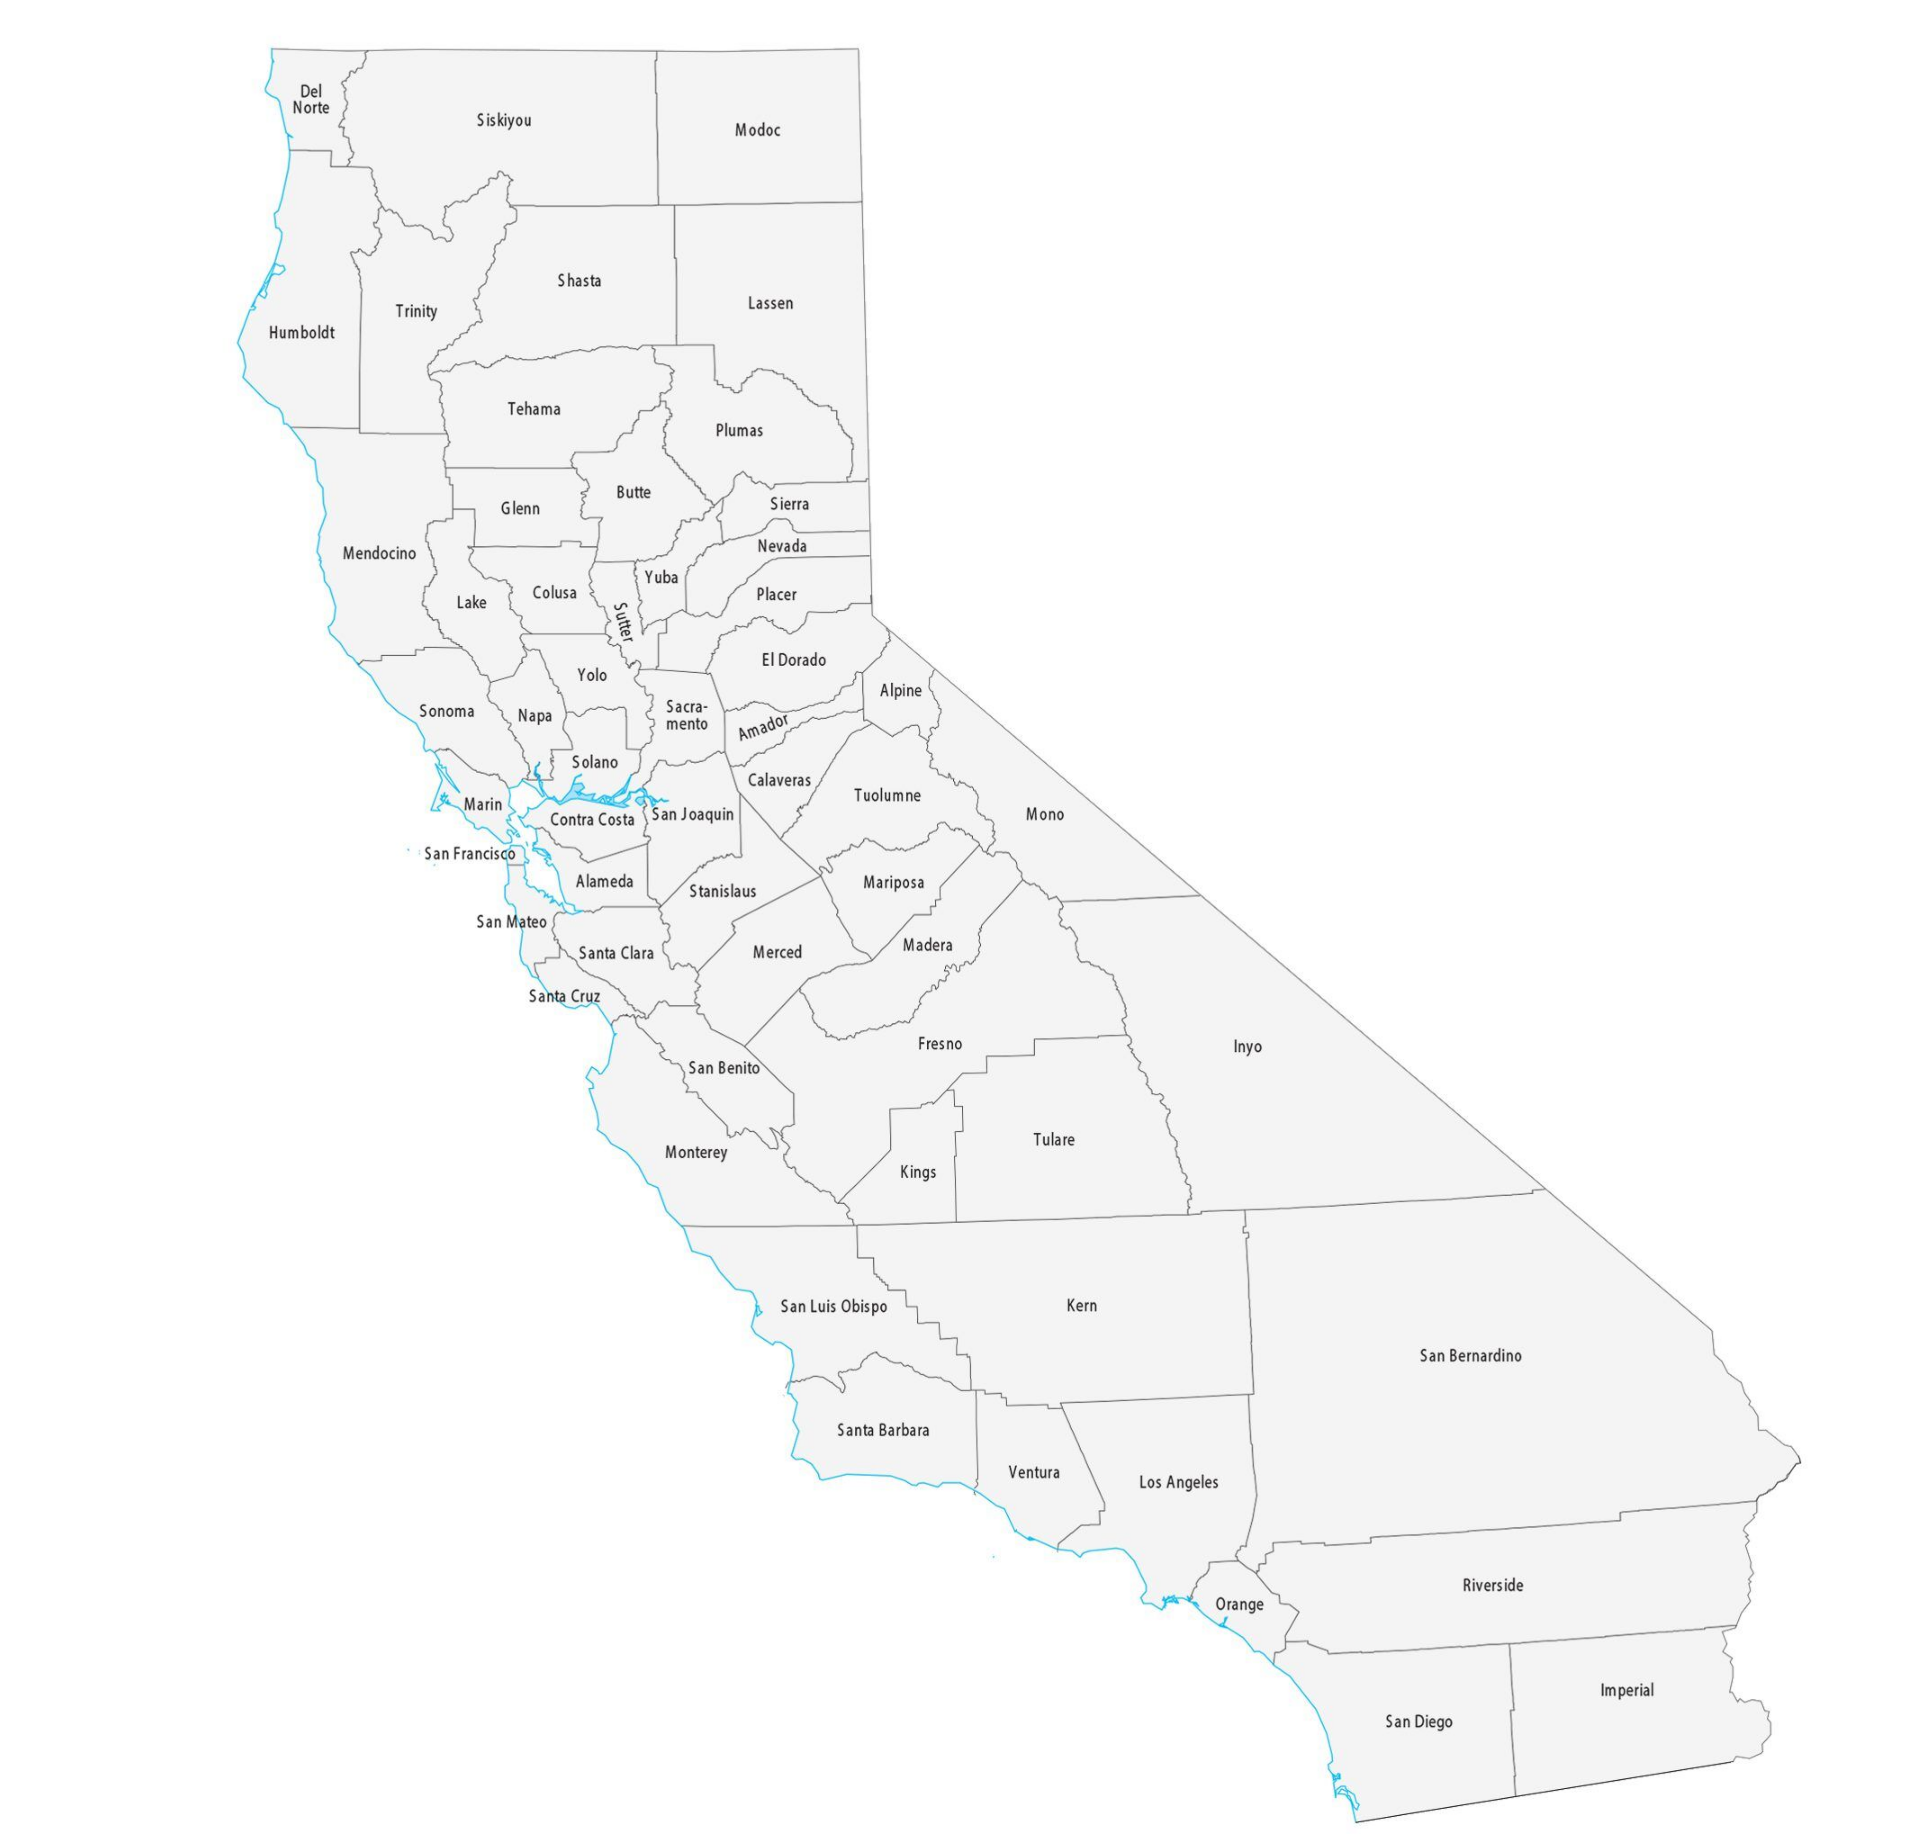

In [5]:
display(img_path)

Inverted Images

In [6]:
inverted_img = cv2.bitwise_not(img)
inverted_img_path = "temp/inverted.jpg" 
cv2.imwrite(inverted_img_path, inverted_img)

True

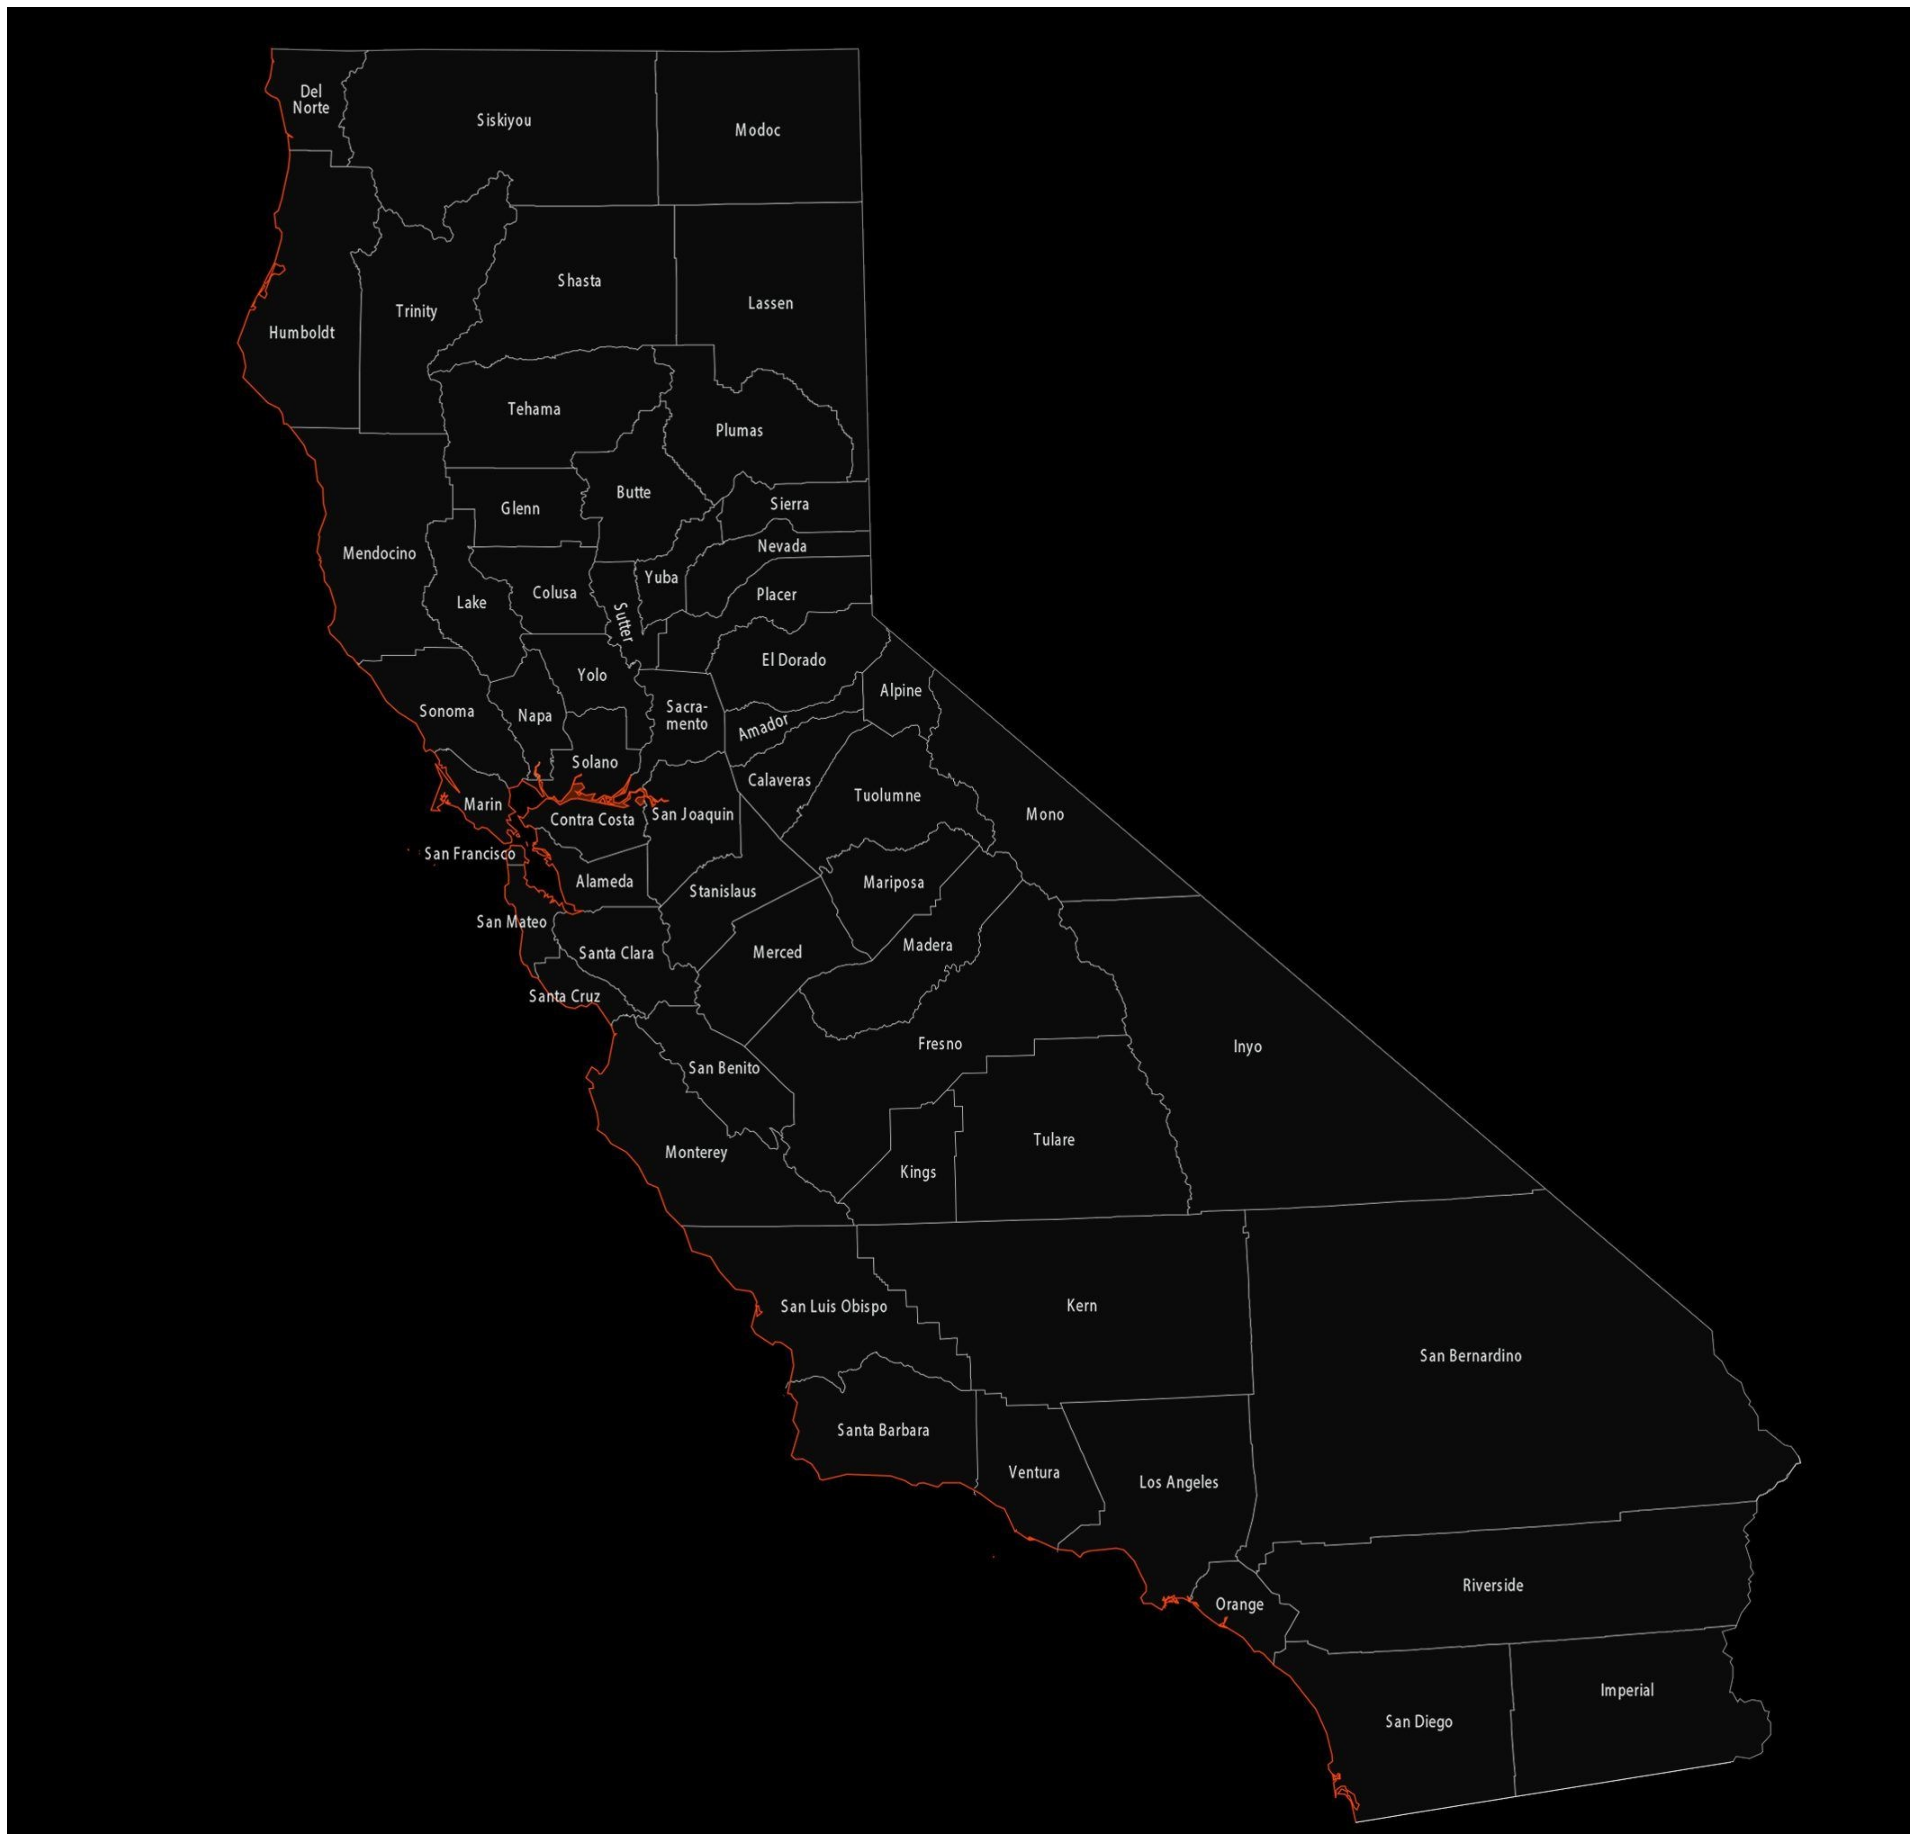

In [7]:
display(inverted_img_path)

Binarization

In [8]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

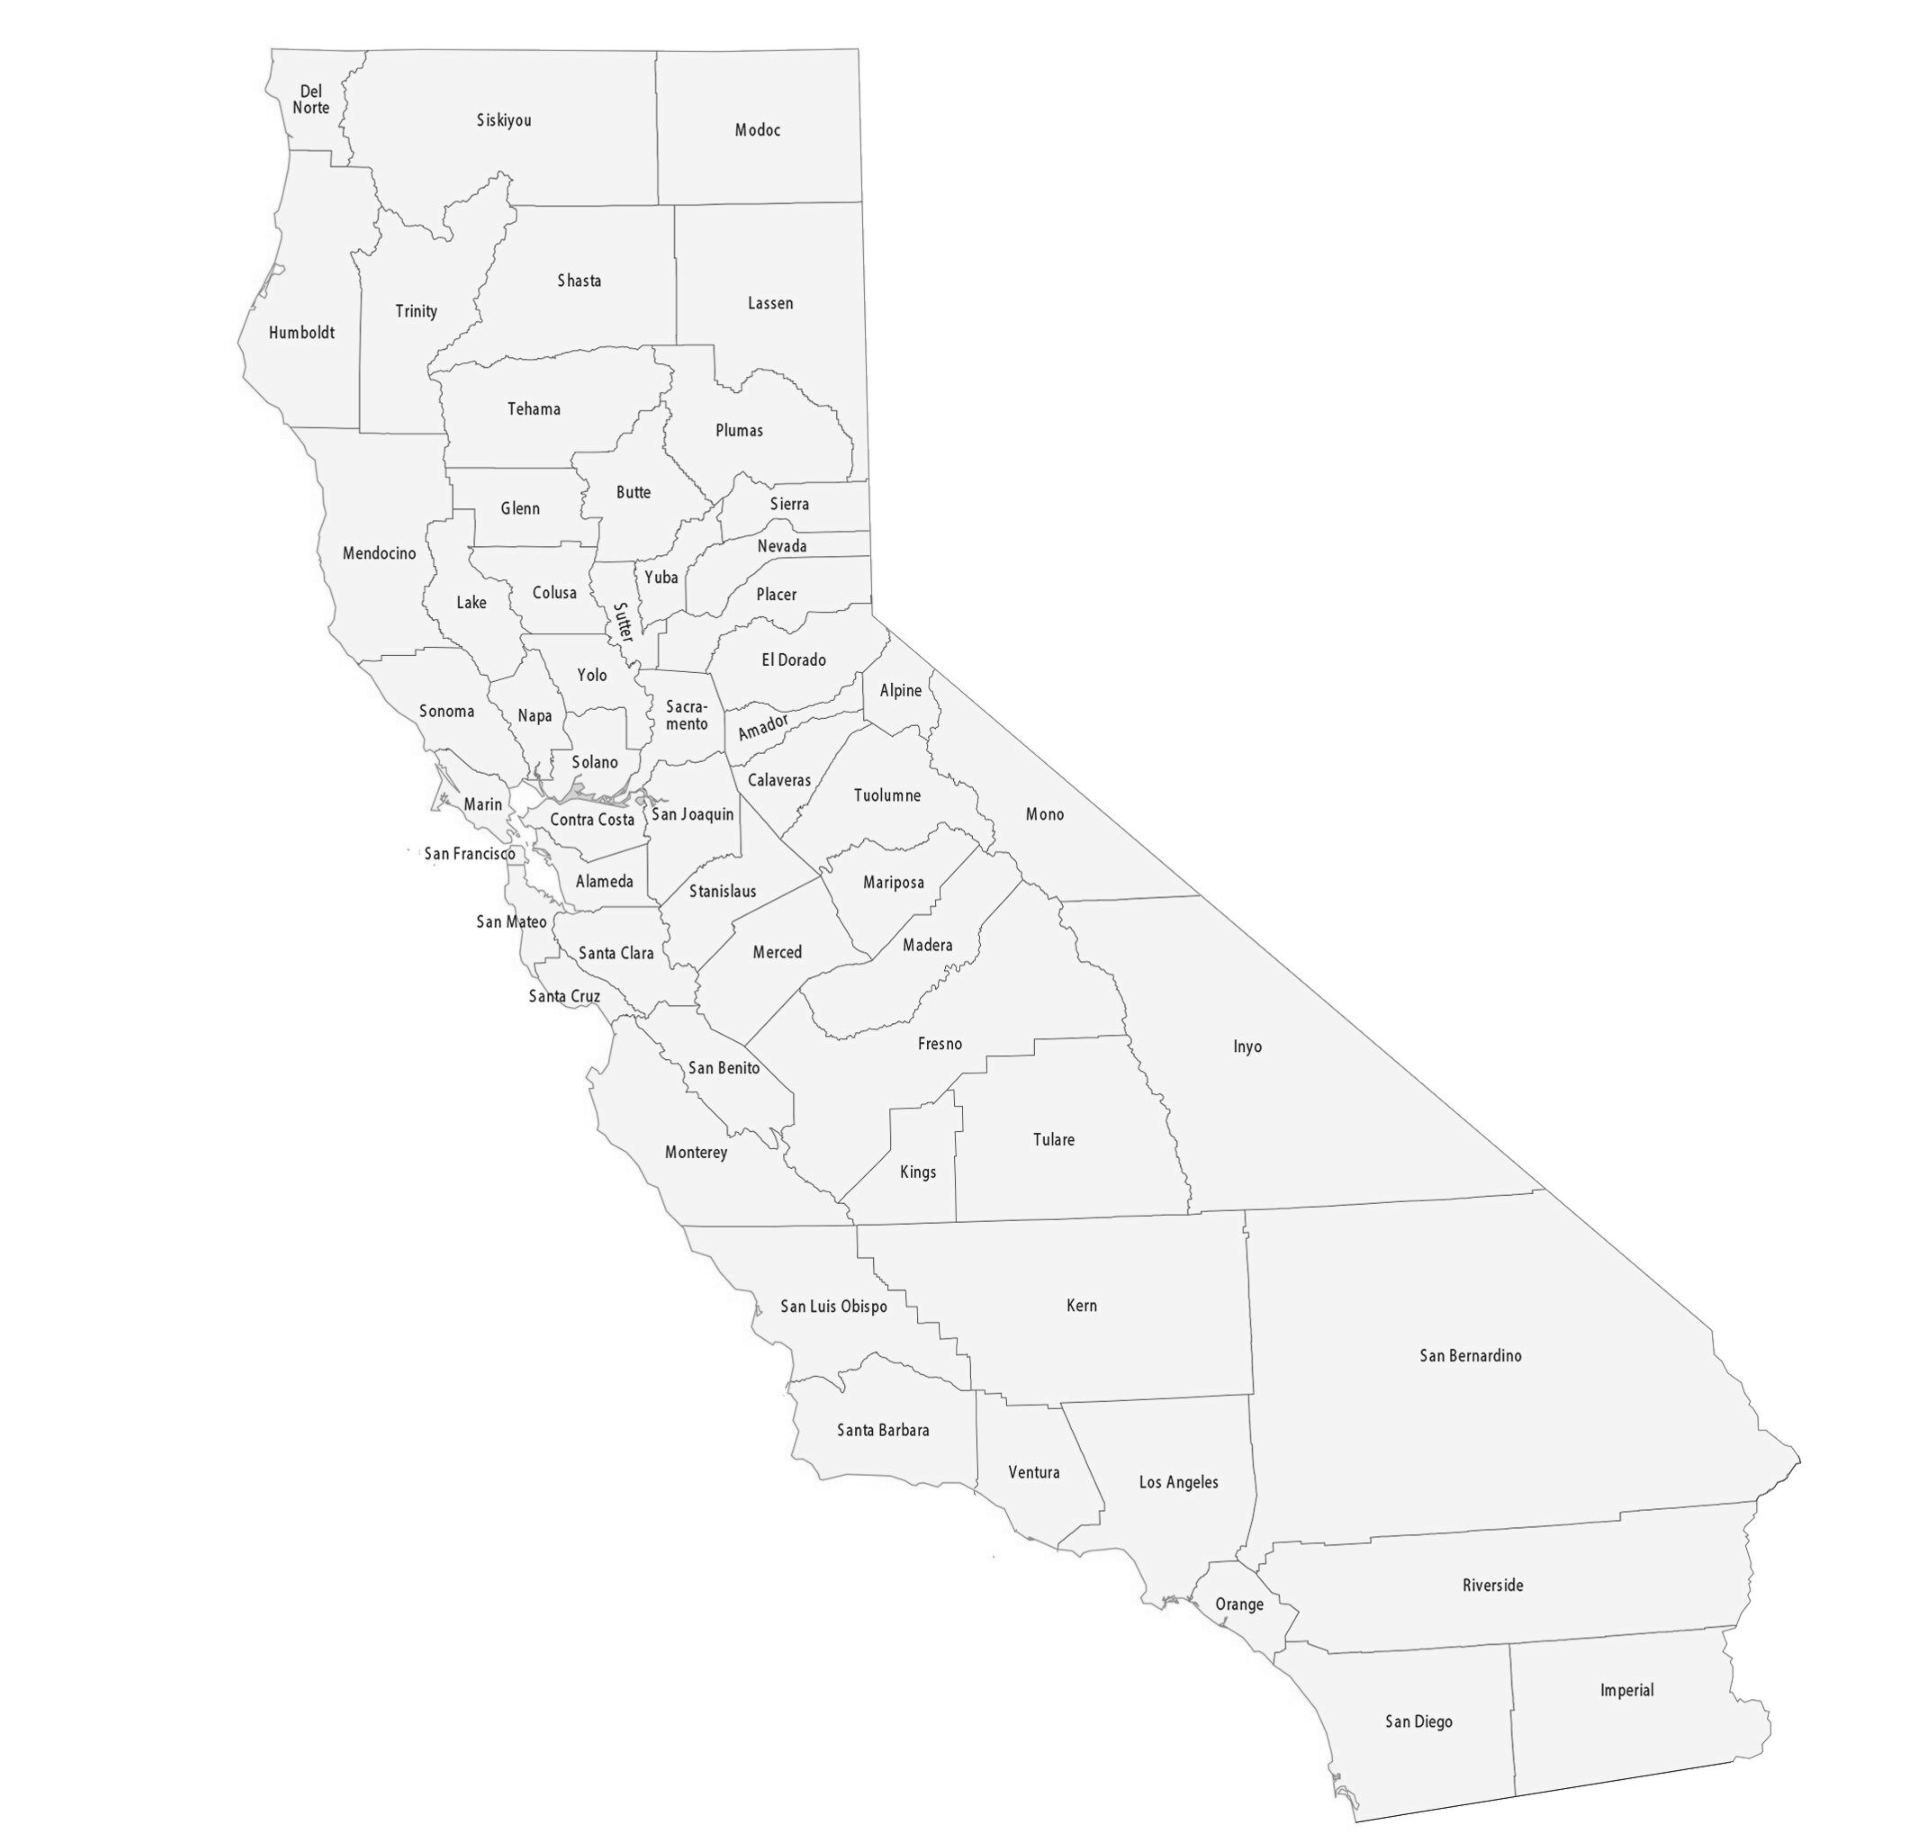

In [10]:
display("temp/gray.jpg")

In [11]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

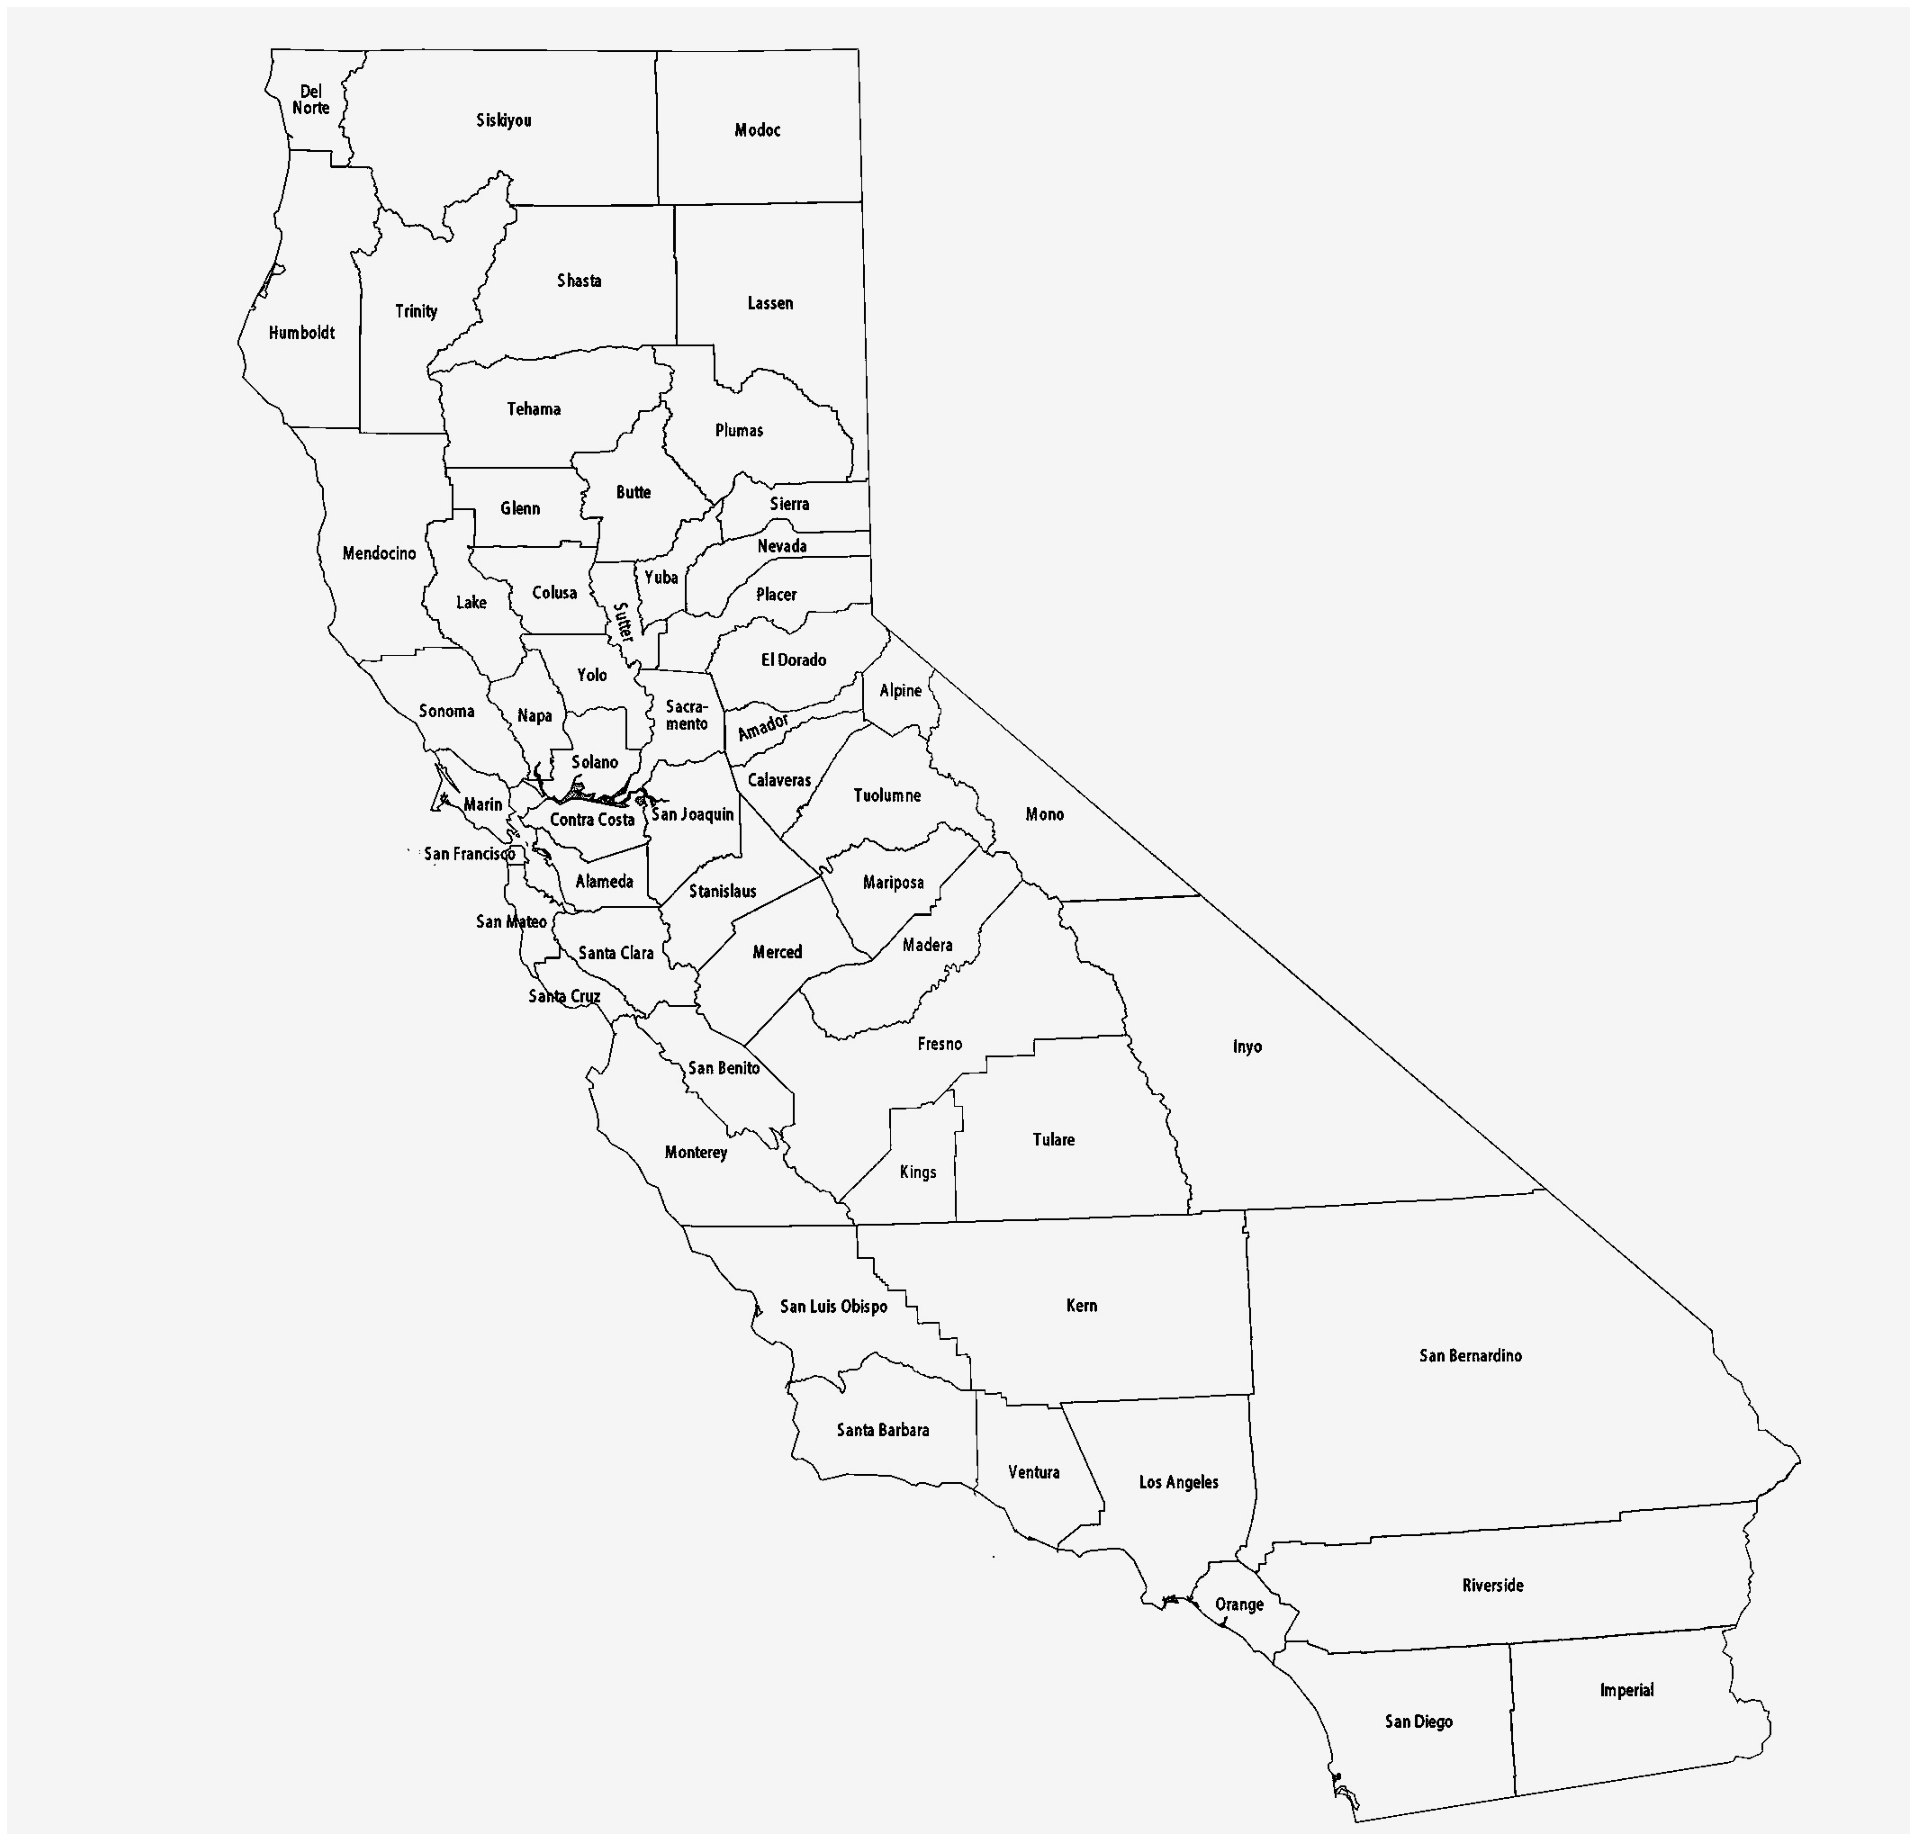

In [12]:
display("temp/bw_image.jpg")

In [13]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [14]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

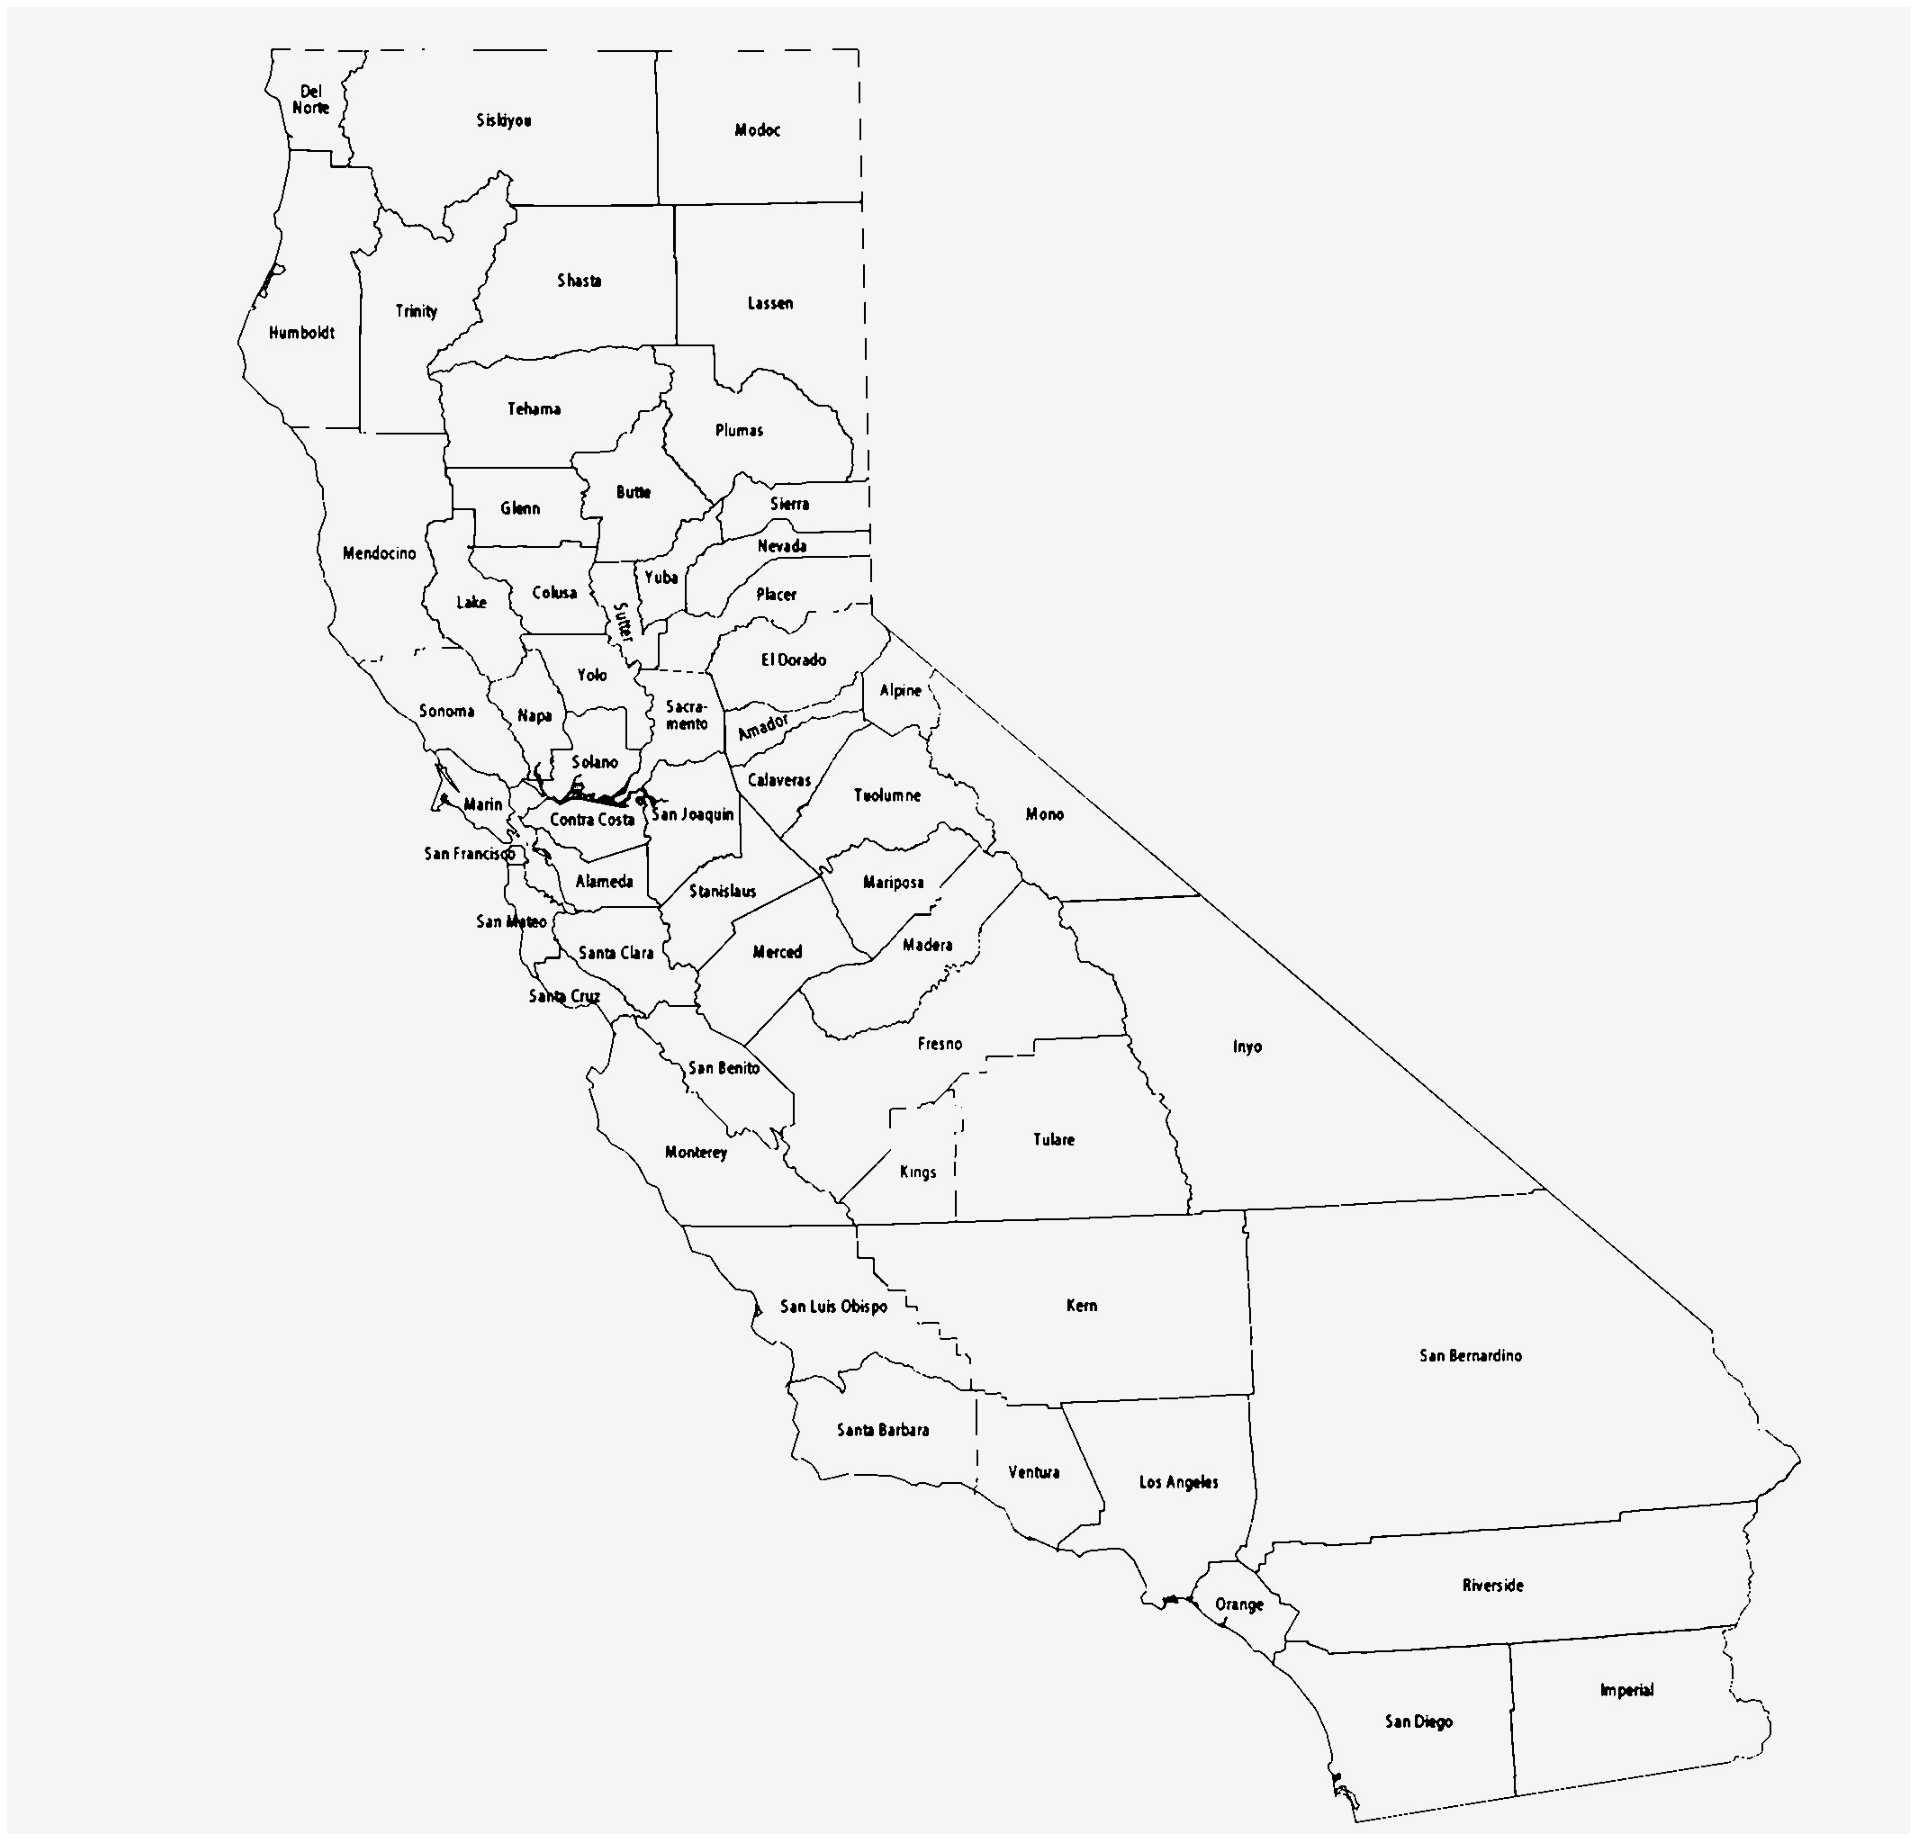

In [15]:
display("temp/no_noise.jpg")

In [16]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [17]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)


True

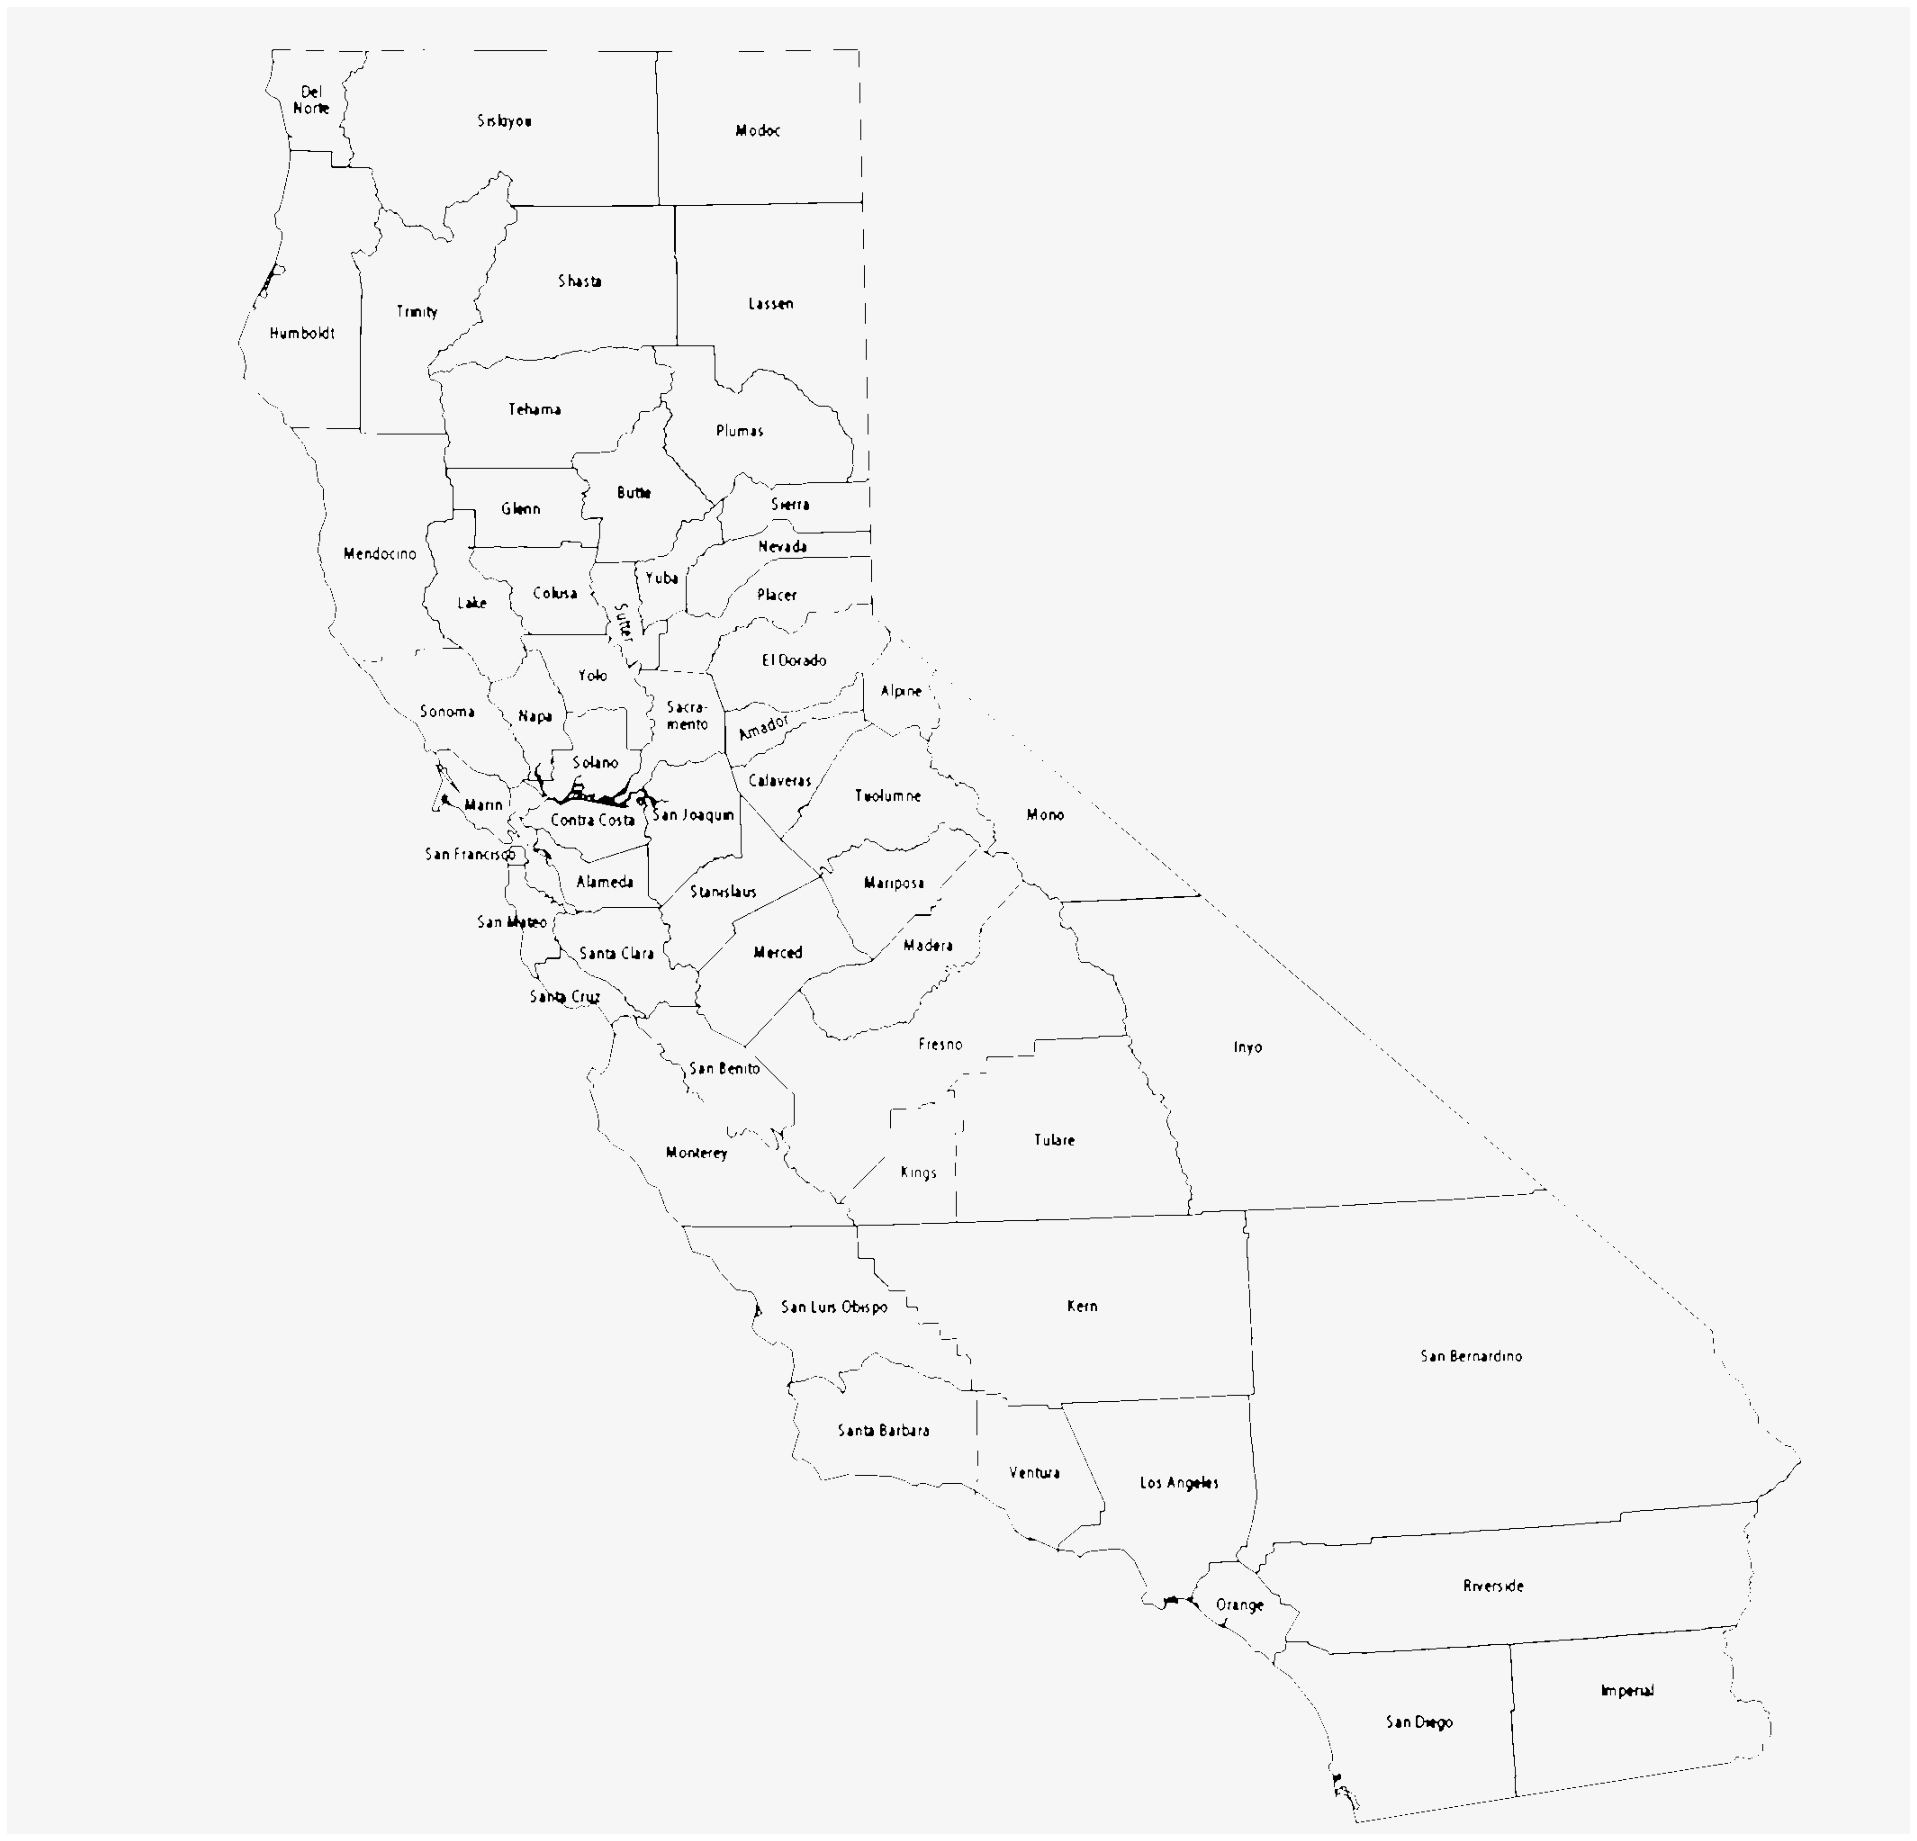

In [18]:
display("temp/eroded_image.jpg")


In [19]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [20]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp/dilated_image.jpg", dilated_image)

True

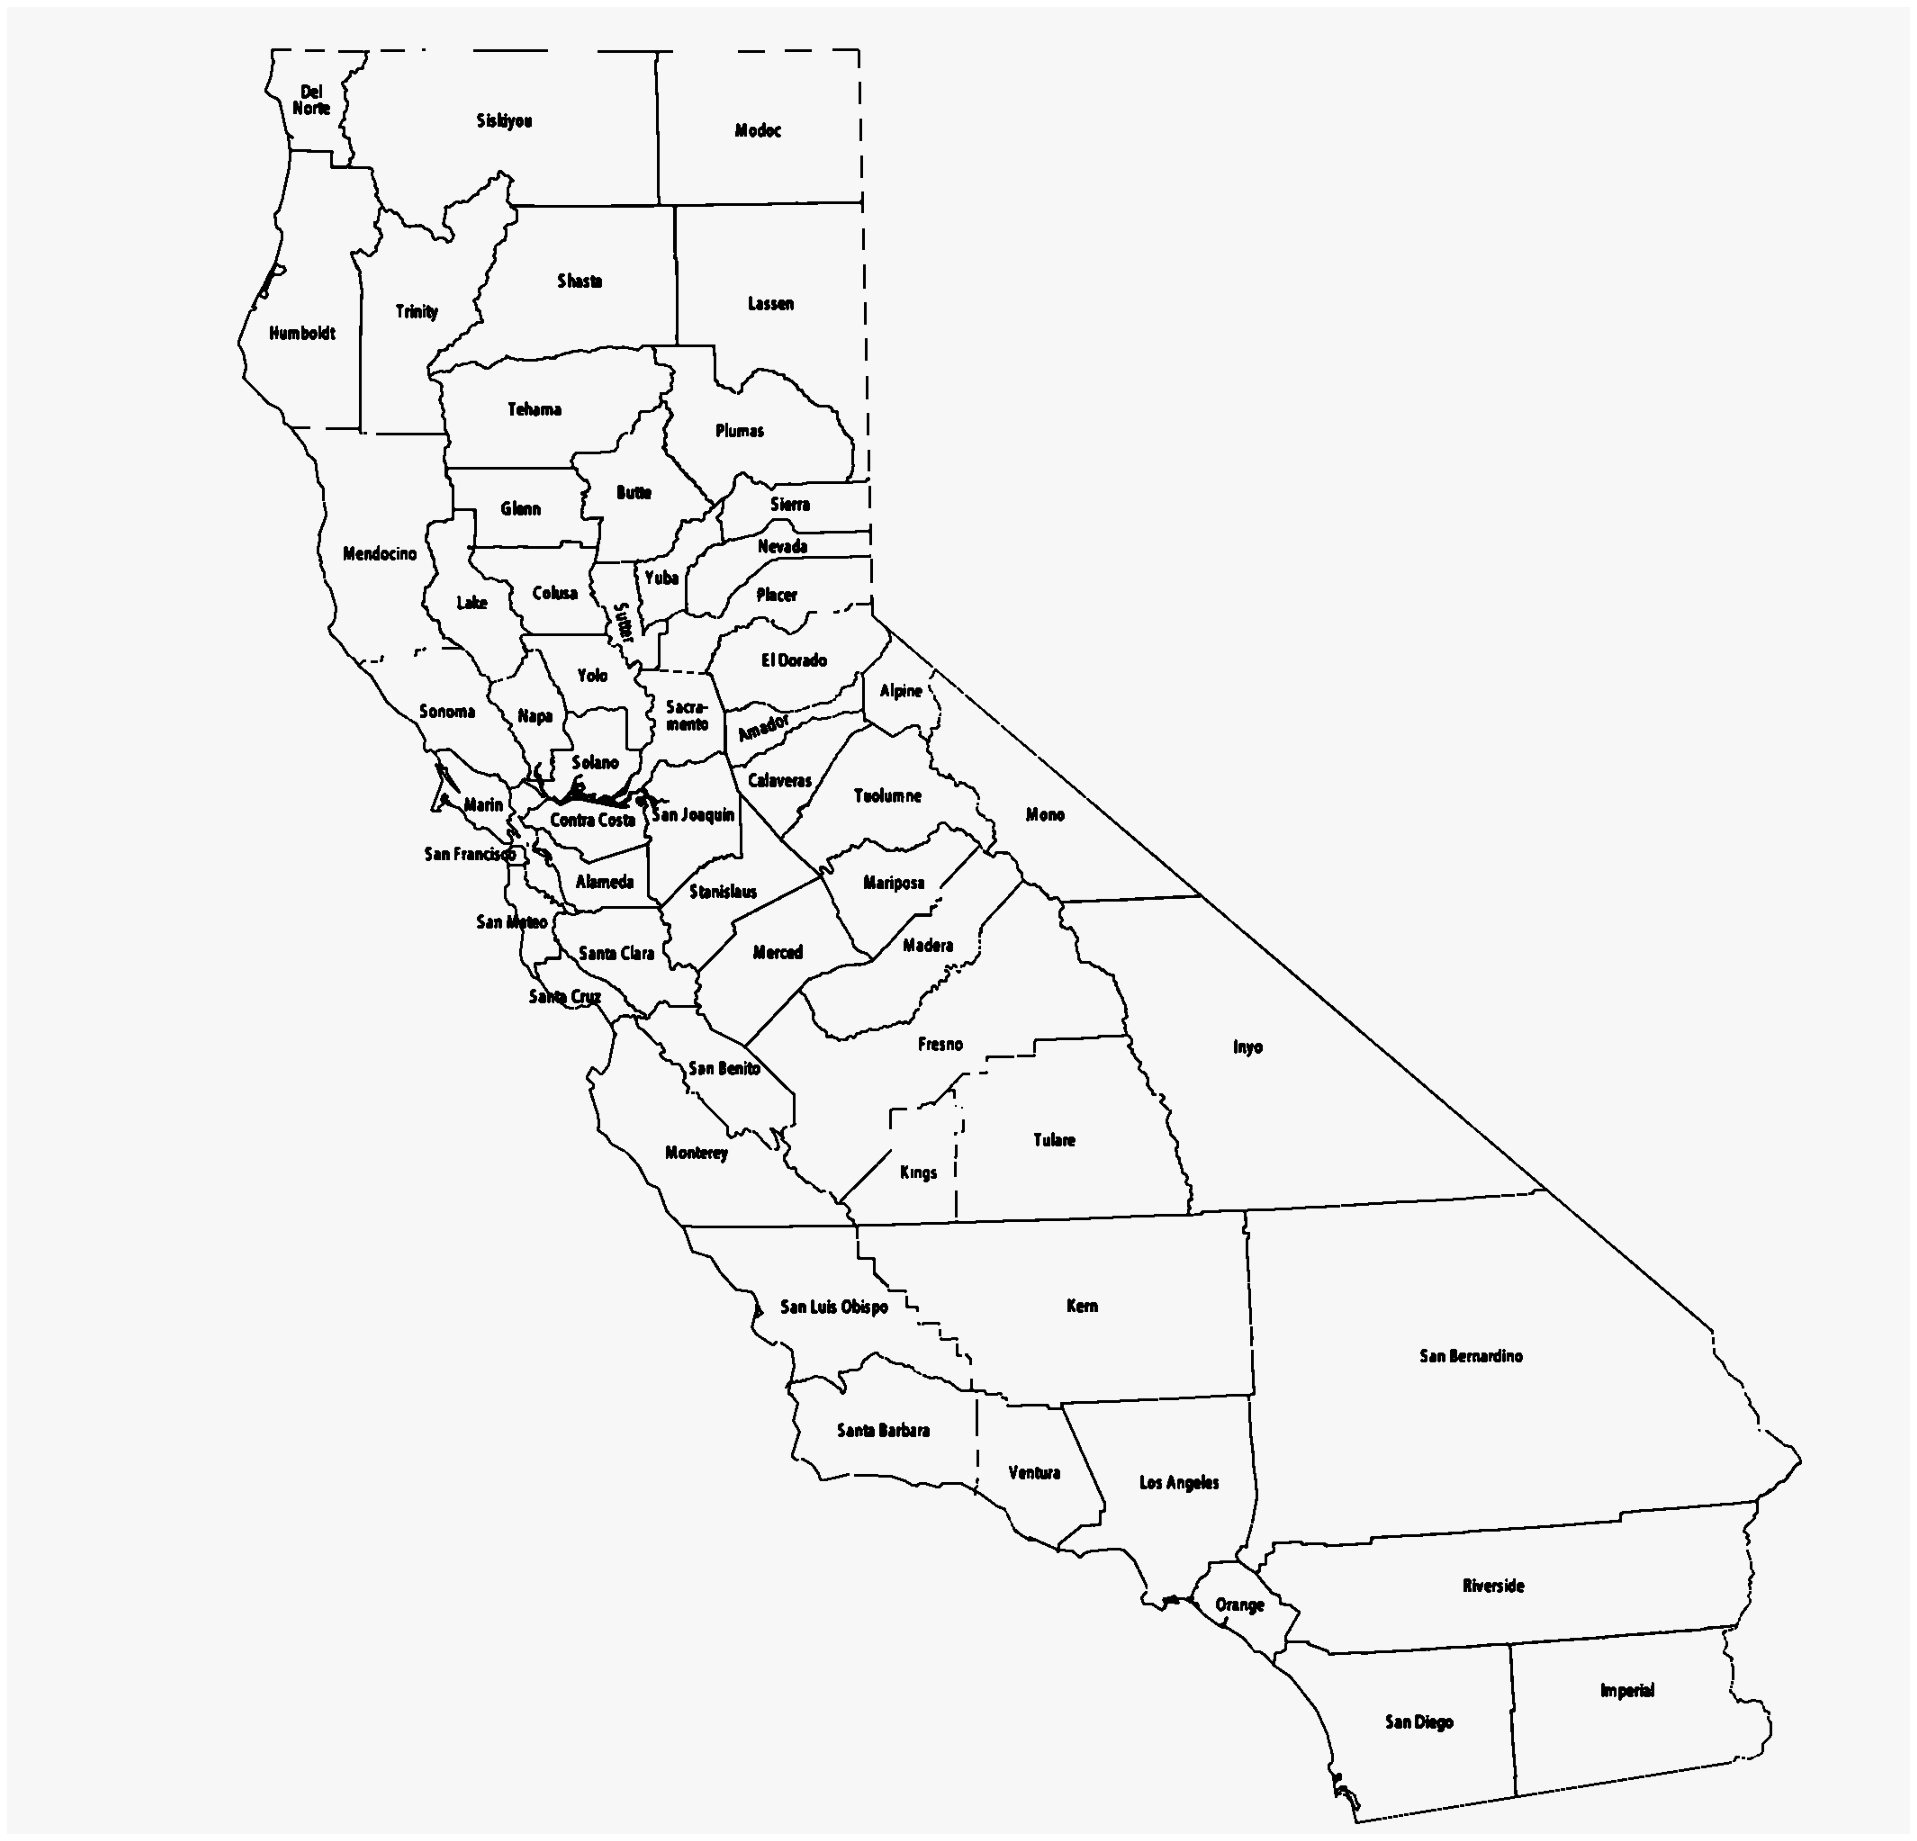

In [21]:
display("temp/dilated_image.jpg")


In [23]:
import pytesseract
from PIL import Image

In [30]:
imgfile = "temp/bw_image.jpg"
img = Image.open(imgfile)

In [31]:
ocr_result = pytesseract.image_to_string(img)


In [32]:
print(ocr_result)

Siskiyou Modoc

Mendocino

eS

Mariposa

Madera

an Joaquin

Fresno

Tulare

San Luis Obispo

San Bernardino

Santa Barbara

Los Angeles

Riverside

